In [1]:
print("VASANTHAKUMAR S CH.SC.U4CSE23257")

VASANTHAKUMAR S CH.SC.U4CSE23257


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv("/content/breast-cancer.csv")

In [5]:
data.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
print("Target names:", data['diagnosis'].unique())
print("Feature names:", data.columns.drop(['id', 'diagnosis']).tolist())

Target names: ['M' 'B']
Feature names: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [9]:
feature_names = data.columns.drop(['id', 'diagnosis']).tolist()
dfl = pd.DataFrame(data[feature_names], columns=feature_names)

In [11]:
sc = StandardScaler()
sc.fit(dfl)
scaled_data = sc.transform(dfl)
principal = PCA(n_components=3)
principal.fit(scaled_data)
x = principal.transform(scaled_data)
print(x.shape)

(569, 3)


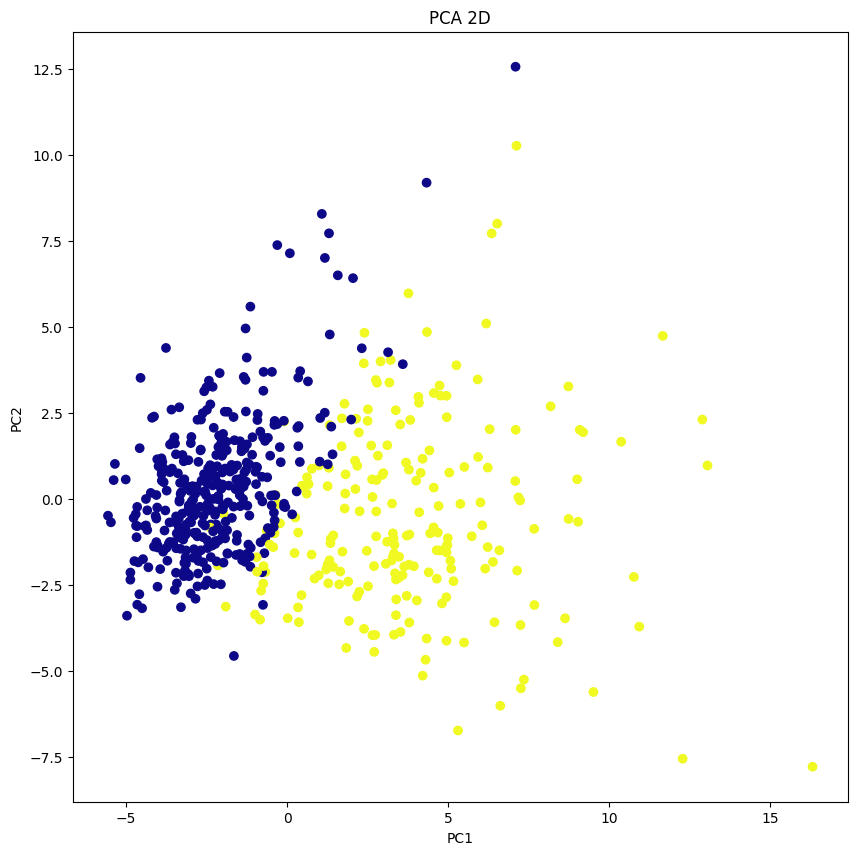

In [13]:
# print(principal.components_) # Uncomment to see the principal components
plt.figure(figsize=(10, 10))
plt.title('PCA 2D')
plt.scatter(x[:, 0], x[:, 1], c=data['diagnosis'].astype('category').cat.codes, cmap='plasma')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show() # Added to display the plot

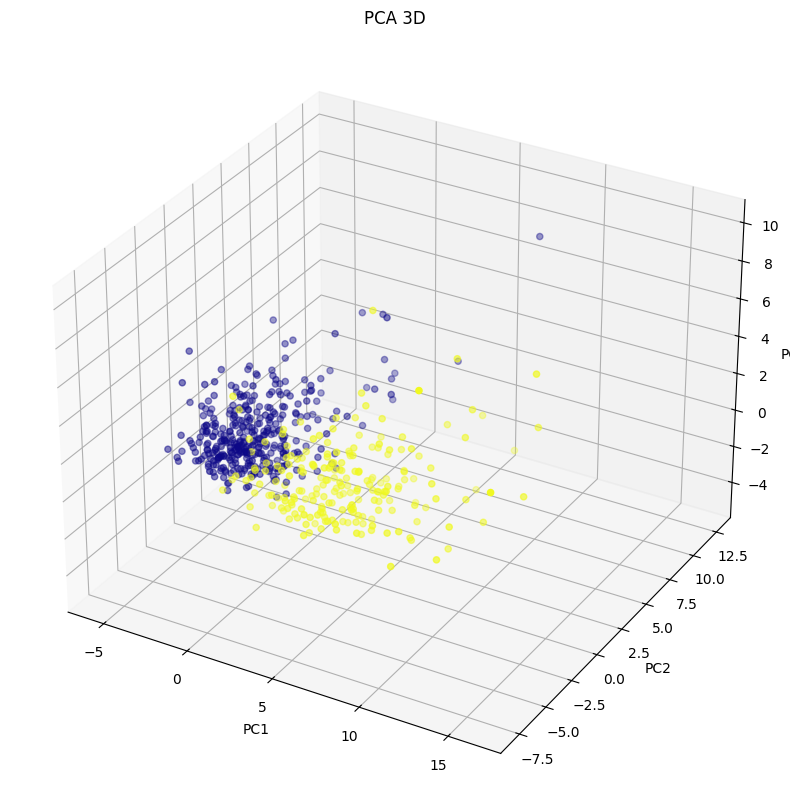

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=data['diagnosis'].astype('category').cat.codes, cmap='plasma')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA 3D')
plt.show()

In [17]:
print(principal.explained_variance_ratio_)

[0.44272026 0.18971182 0.09393163]
